<a href="https://colab.research.google.com/github/Elliefffish/ml-final-Stitanic/blob/main/%E3%80%8Cml_final_project_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gulidelines for Homework & Term Project
1. You should do proper data analysis and feature engineering in the begining.
2. You should try different model architectures (perhaps starting from simple ones if not using transfer learning) and doing hyperparameter tuning. Moreover, you should always consider applying normalization techniques in the model.
3. You should use the performance on validation set (better with cross validation) to select the best model. Moreover, you should use the learing curves to identify the sign of underfitting/overfitting and deal with the identified problem.
4. After determining your best model, you should train the best model on the full training set (including the validation set), and this gives you the final model.
5. You should present the following information in the concluding paragraph:
  1. Description of your final model including model architecture, number of parameters, and associated mechanisms.
  2. Performance of the final model on the test set. Notice that you can only present the test performance once.

 # Chapter2. Outline
 1. Look at the big picture.
 2. Get the data.
 3. Discover and visualize the data to gain insights.
 4. Prepare the data for Machine Learning algorithms.
 5. Select a model and train it.
 6. Fine-tune your model.
 7. Present your solution.
 8. Launch, monitor, and maintain your system.

# 畫圖工具

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
# Create an array with the colors you want to use
colors = ["#A2C4C9", "#E49788"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

# Big picture

# Get data

In [2]:
''' Download kaggle data in Google Colab '''
! pip install -q kaggle
from google.colab import files

# 登入 Kaggle > My Account > Create New API Token，這步會在你的電腦下載一個 kaggle.json 檔案。
# 上傳剛剛下載好的 kaggle.json 檔案。
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c 'spaceship-titanic'
! mkdir spaceship-titanic
! unzip spaceship-titanic.zip -d spaceship-titanic

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘spaceship-titanic’: File exists
Archive:  spaceship-titanic.zip
replace spaceship-titanic/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spaceship-titanic/sample_submission.csv  
replace spaceship-titanic/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spaceship-titanic/test.csv  
replace spaceship-titanic/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: spaceship-titanic/train.csv  


In [3]:
import pandas as pd
import numpy as np
train = pd.read_csv('spaceship-titanic/train.csv')
test = pd.read_csv('spaceship-titanic/test.csv')

- `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for Port or `S` for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. **This is the target, the column you are trying to predict**.

# Discover and Visualize the data

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Text(0.5, 0, 'Age')

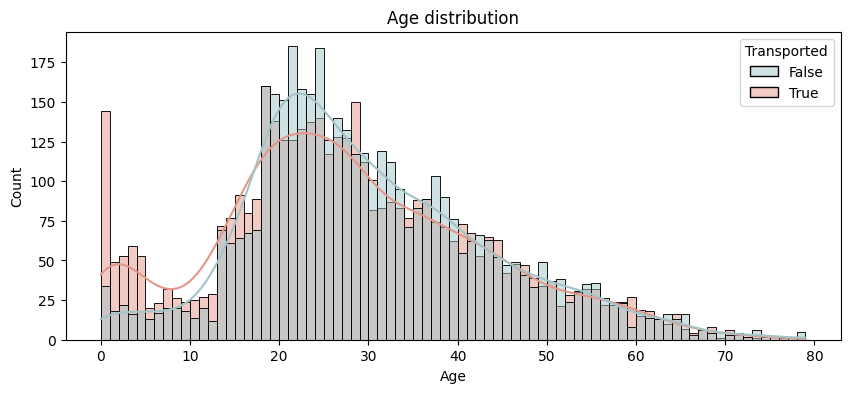

In [ ]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age')

In [ ]:
train['VIP'].value_counts()

,count
VIP,
False,8291
True,199


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Text(0.5, 0, 'Age')

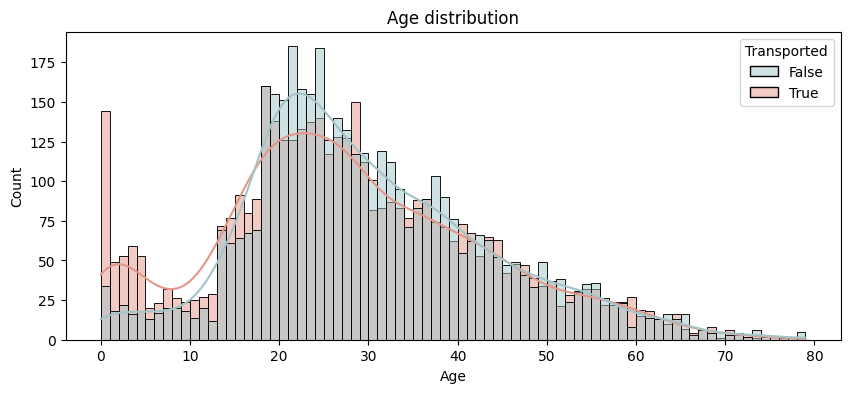

In [ ]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age')

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test['CryoSleep'].value_counts()

,count
CryoSleep,
False,2640
True,1544


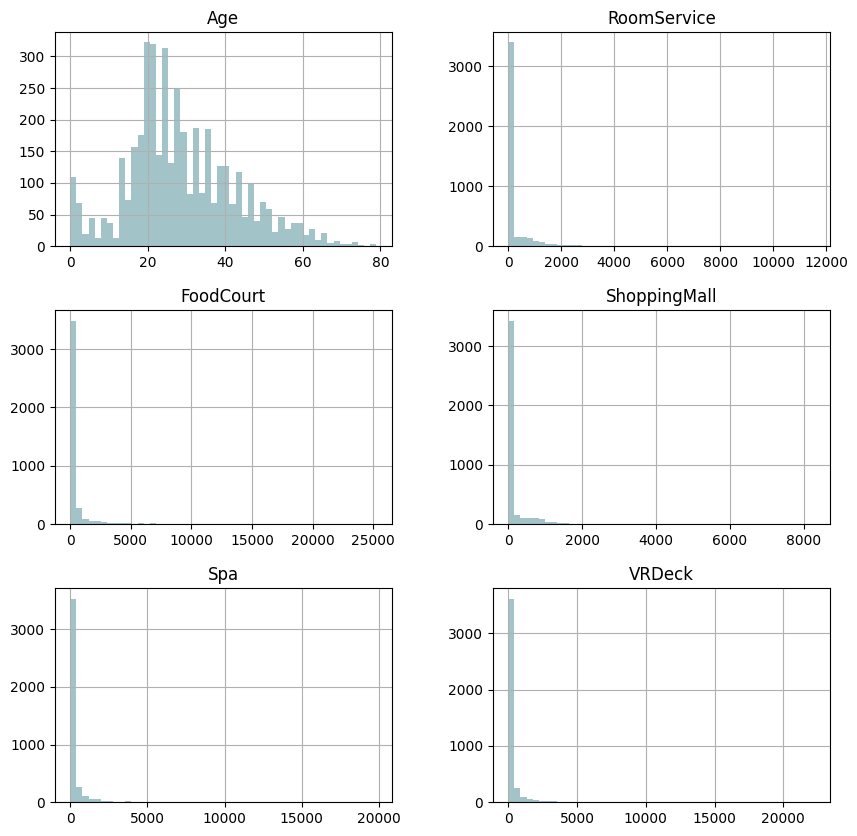

In [ ]:
test.hist(bins=50,figsize=(10,10))
plt.show()

# Prepare Data for ML Algorithms

##  Data Cleaning

In [54]:
passenger = train.copy()
passenger_test = test.copy()

In [55]:
#---------- 處理 Cabin - Train ----------#
def missing_Cabin(passenger):
    df = pd.DataFrame()
    df['Cabin'] = passenger.Cabin
    df[["GroupId", "ppId"]] = passenger.PassengerId.str.split(pat="_", expand=True)

    # Set Cabin
    for i in passenger[passenger.Cabin.isna()].index:
        # if there are any group member，set Cabin as them.
        Group_Cabin = df.loc[df['GroupId'] == df.loc[i, 'GroupId'], 'Cabin'].mode()
        if not pd.isna(df.loc[i, 'GroupId']) and (not Group_Cabin.empty):
            passenger.loc[i, 'Cabin'] = Group_Cabin.iloc[0]
missing_Cabin(passenger)

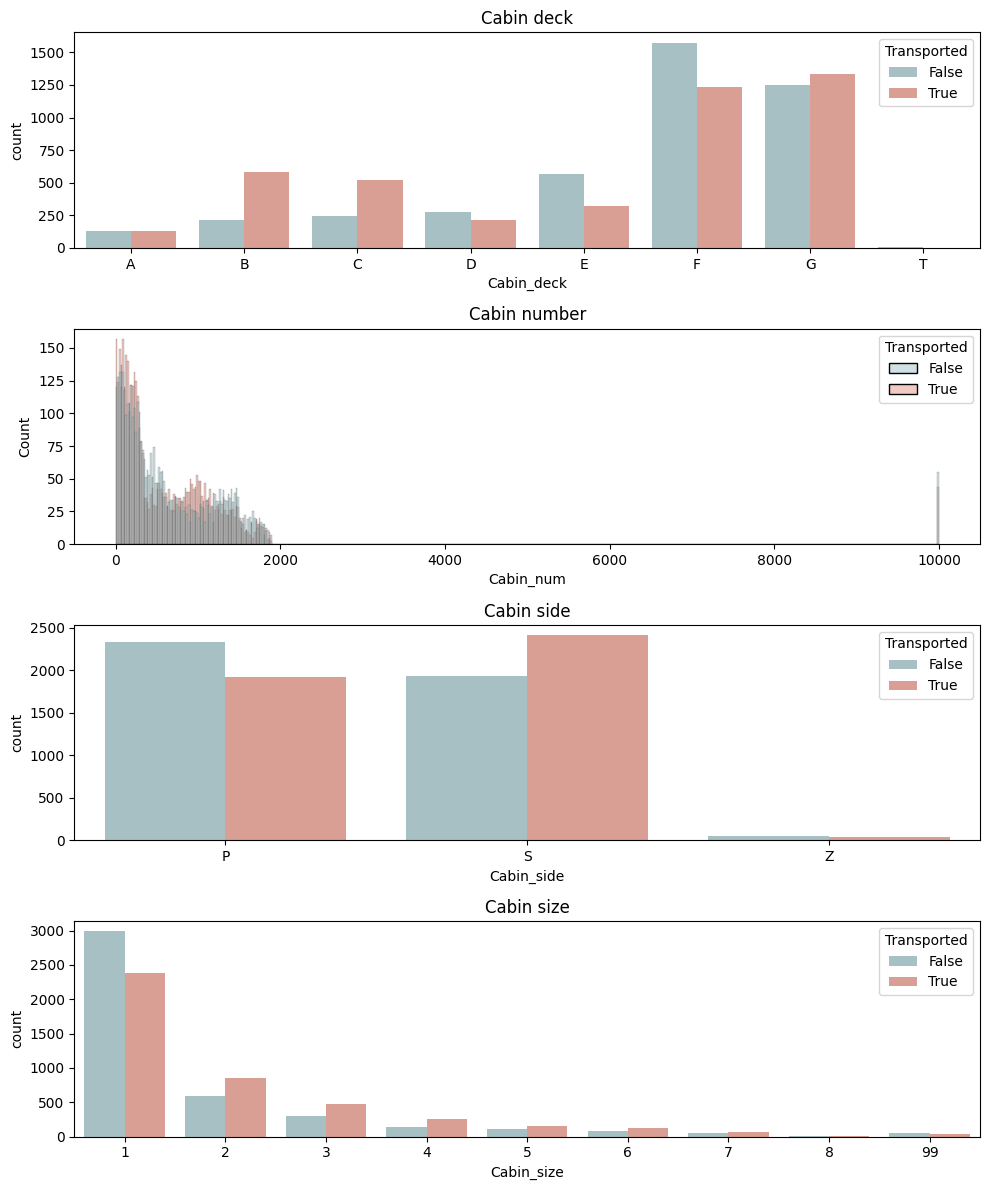

In [57]:
#---------- 處理 HomePlanet - Train ----------#
def missing_HomePlanet(passenger):
    # Name -> FirstName, LastName
    # HomePlanet 的 NAN 會參考 LastName 設定值
    df = pd.DataFrame()
    df['HomePlanet'] = passenger.HomePlanet
    df[["FirstName", "LastName"]] = passenger.Name.str.split(pat=" ", expand=True)

    # Set HomePlante
    for i in passenger[passenger.HomePlanet.isna()].index:
        # if there is any family member，set HomePlanet as them.
        HomePlanet = df.loc[df['LastName'] == df.loc[i, 'LastName'], 'HomePlanet'].mode()
        if not HomePlanet.empty:
            passenger.loc[i, 'HomePlanet'] = HomePlanet.iloc[0]
missing_HomePlanet(passenger)

In [ ]:
def split_Cabin(passenger):
    # # Cabin (deck/num/side)
    passenger[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = passenger.Cabin.str.split(pat="/", expand=True)
    passenger['Cabin_num'] = pd.to_numeric(passenger['Cabin_num'], downcast='integer', errors='coerce')
    return passenger

split_Cabin(passenger)
split_Cabin(passenger_test)

(0.0, 2000.0)

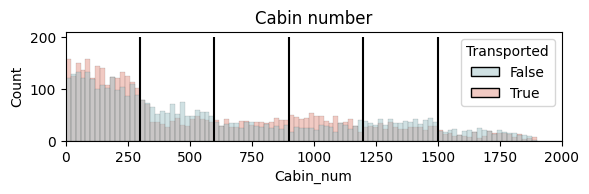

In [58]:
# Plot distribution of new features
plt.subplot(3,1,2)
sns.histplot(data=passenger, x='Cabin_num', hue='Transported',binwidth=20)
for i in range(300, 1800, 300):
    plt.vlines(i, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])


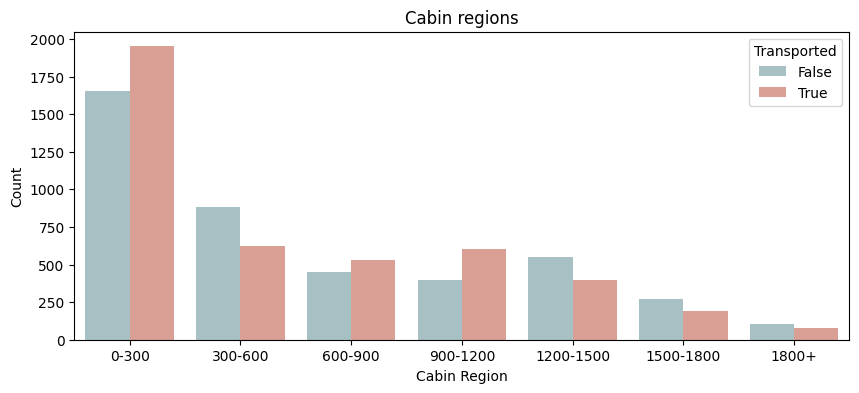

In [59]:
def split_Cabin_num(passenger):
    for i in range(300, 1800, 300):
        passenger[f'Cabin_{i/300}'] = ((passenger['Cabin_num']> i-300) & (passenger['Cabin_num'] < i)).astype('category')
        passenger[f'Cabin_7.0'] = (passenger['Cabin_num'] >= 1800).astype('category')
    return passenger

split_Cabin_num(passenger)
split_Cabin_num(passenger_test)

# Plot the distribution of the new features
passenger['Cabin_regions_plot'] = pd.cut(
    passenger['Cabin_num'],
    bins=[0, 300, 600, 900, 1200, 1500, 1800, float('inf')],
    labels=['0-300', '300-600', '600-900', '900-1200', '1200-1500', '1500-1800', '1800+']
)

plt.figure(figsize=(10, 4))
sns.countplot(data=passenger, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
plt.xlabel('Cabin Region')
plt.ylabel('Count')
plt.show()

passenger.drop('Cabin_regions_plot', axis=1, inplace=True)

Text(0.5, 1.0, 'Familysize')

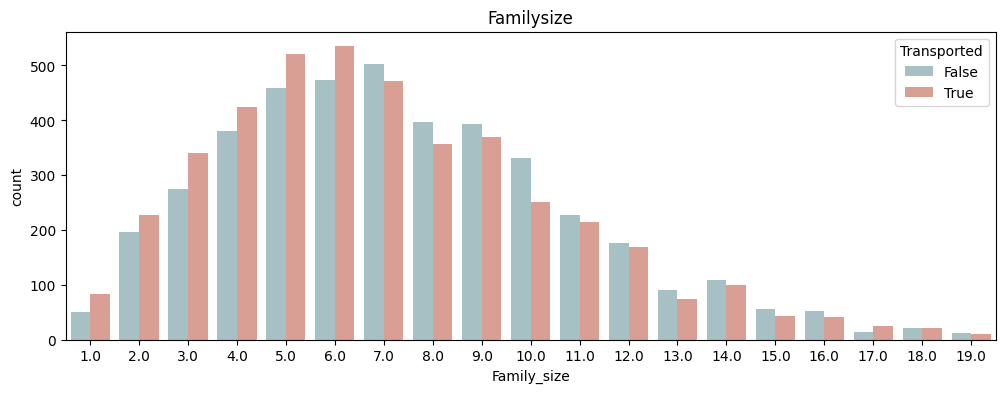

In [63]:

# New feature - Family size
def create_family_size(passenger):
    passenger['Family_size'] = passenger['LastName'].map(lambda x: pd.concat([passenger['LastName'], passenger_test['LastName']]).value_counts()[x] if pd.notna(x) else np.nan)
    return passenger

create_family_size(passenger)
create_family_size(passenger_test)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=passenger, x='Family_size', hue='Transported')
plt.title('Familysize')
plt.show()

# Median family size
median_family_size = passenger['Family_size'].median()
print(f"The median family size is: {median_family_size}")

In [65]:
# New feature - Family type
def create_family_type(passenger):
    passenger['Small_family'] = passenger['Family_size'] < 7
    passenger['Family_size'] = passenger['Family_size'].astype('category')
    return passenger

create_family_type(passenger)
create_family_type(passenger_test)

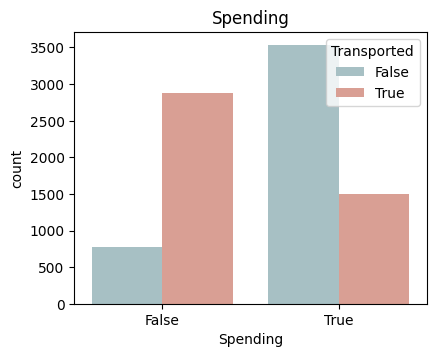

In [67]:
passenger['Expenditure'] = passenger[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
passenger['Spending'] = (passenger['Expenditure']!=0).astype('bool')
passenger_test['Expenditure'] = passenger_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
passenger_test['Spending'] = (passenger_test['Expenditure']!=0).astype('bool')
fig=plt.figure(figsize=(10,12))

plt.subplot(3,2,2)
sns.countplot(data=passenger, x='Spending', hue='Transported')
plt.title('Spending')
plt.show()

In [68]:
#---------- 處理 CryoSleep - Train ----------#
def missing_CryoSleep(passenger):
    df = pd.DataFrame()
    df['CryoSleep'] = passenger.CryoSleep
    df['Spending'] = passenger[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1).astype('bool')

    for i in passenger[passenger.CryoSleep.isna()].index:
        if df.loc[i, 'Spending'] == True:
            passenger.loc[i, 'CryoSleep'] = False

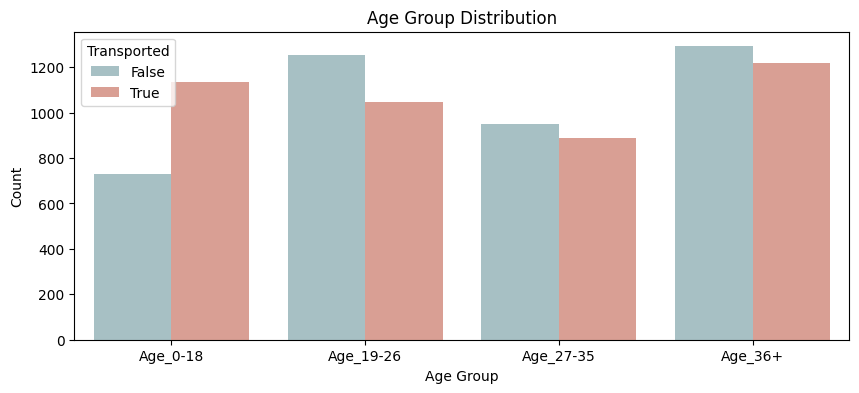

In [70]:
def create_age_group(data):
    data['Age_group'] = pd.Series(dtype='object')  # Create with object dtype
    data.loc[data['Age'] <= 18, 'Age_group'] = 'Age_0-18'
    data.loc[(data['Age'] > 18) & (data['Age'] <= 26), 'Age_group'] = 'Age_19-26'
    data.loc[(data['Age'] > 26) & (data['Age'] <= 35), 'Age_group'] = 'Age_27-35'
    data.loc[(data['Age'] > 35), 'Age_group'] = 'Age_36+'

# Apply the new age group function to train and test datasets
create_age_group(passenger)
create_age_group(passenger_test)
# Plot the distribution of the new age groups
plt.figure(figsize=(10, 4))
g = sns.countplot(data=passenger, x='Age_group', hue='Transported', order=['Age_0-18', 'Age_19-26', 'Age_27-35', 'Age_36+'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

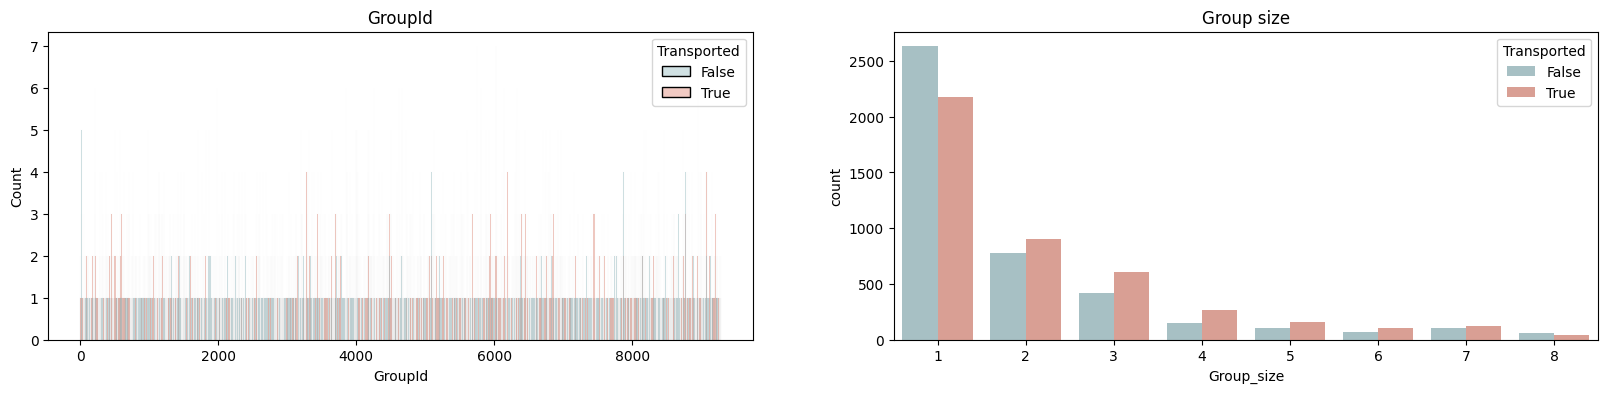

In [71]:
passenger['Group_size']=passenger['GroupId'].map(lambda x: pd.concat([passenger['GroupId'], passenger_test['GroupId']]).value_counts()[x])
passenger_test['Group_size']=passenger_test['GroupId'].map(lambda x: pd.concat([passenger['GroupId'], passenger_test['GroupId']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=passenger, x='GroupId', hue='Transported', binwidth=1)
plt.title('GroupId')

plt.subplot(1,2,2)
sns.countplot(data=passenger, x='Group_size', hue='Transported')
plt.title('Group size')

(0.0, 3000.0)

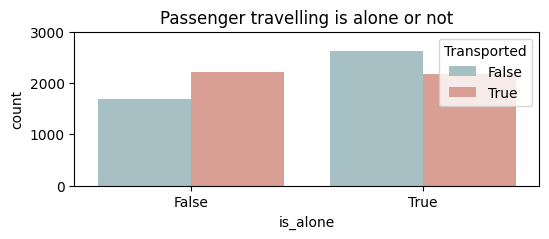

In [73]:
# Add feature "is_alone"
passenger['is_alone']=(passenger['Group_size']==1).astype(bool)
passenger_test['is_alone']=(passenger_test['Group_size']==1).astype(bool)

plt.figure(figsize=(6,2))
sns.countplot(data=passenger, x='is_alone', hue='Transported')
plt.title('Passenger travelling is alone or not')
plt.ylim([0,3000])

In [74]:
data = passenger.copy()
data_test = passenger_test.copy()
# Drop Useless attr
passenger = passenger.drop(["PassengerId", "GroupId", "ppId", "Cabin", "Name", "FirstName", "LastName", "Group_size","Cabin_num", "Cabin_size"], axis=1)
# Drop Useless attr
passenger_test = passenger_test.drop(["PassengerId", "GroupId", "ppId", "Cabin", "Name", "FirstName", "LastName","Group_size","Cabin_num", "Cabin_size"], axis=1)


In [75]:
# check missing values
print(f'Train set missing values:\n {passenger.isnull().sum()}')
print(f'\nTest set missing values:\n {passenger_test.isnull().sum()}')

Train set missing values:
 HomePlanet       15
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_deck        0
Cabin_side        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
Family_size     200
Small_family      0
Expenditure       0
Spending          0
Age_group       179
is_alone          0
dtype: int64

Test set missing values:
 HomePlanet       22
CryoSleep         0
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_deck        0
Cabin_side        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
Family_size      94
Small_family      0
Expenditure       0
Spending     

In [76]:
# Columns with missing values
na_cols=passenger.columns[passenger.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(passenger[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(passenger),2)
mv

,Number_missing,Percentage_missing
HomePlanet,15,0.17
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16
Family_size,200,2.30


In [77]:
# Define numerical and categorical features
numerical_features = [ col for col in passenger.columns if passenger[col].dtype in ['int64', 'float64']]
categorical_features = [ col for col in passenger.columns if passenger[col].dtype in ['object', 'bool', 'category'] and col != 'Transported']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')



Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
Categorical features: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side', 'Cabin_1.0', 'Cabin_2.0', 'Cabin_3.0', 'Cabin_4.0', 'Cabin_5.0', 'Cabin_7.0', 'Family_size', 'Small_family', 'Spending', 'Age_group', 'is_alone']


In [137]:
print(passenger['Cabin_deck'].mode([0]))

0    F
Name: Cabin_deck, dtype: object


In [78]:
for col in categorical_features:
    passenger[col] = passenger[col].fillna(passenger[col].mode()[0])  # Fill with mode of each column
    passenger_test[col] = passenger_test[col].fillna(passenger[col].mode()[0]) # Fill with mode of each column

# check missing values
print(f'passenger set missing values:\n {passenger.isnull().sum()}')
print(f'\npassenger_test set missing values:\n {passenger_test.isnull().sum()}')

passenger set missing values:
 HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_deck        0
Cabin_side        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
Family_size       0
Small_family      0
Expenditure       0
Spending          0
Age_group         0
is_alone          0
dtype: int64

passenger_test set missing values:
 HomePlanet        0
CryoSleep         0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_deck        0
Cabin_side        0
Cabin_1.0         0
Cabin_2.0         0
Cabin_3.0         0
Cabin_4.0         0
Cabin_5.0         0
Cabin_7.0         0
Family_size       0
Small_family      0
Expenditure       0

In [79]:
from sklearn.impute import KNNImputer
# impute missing values with knn imputer
num_imputer_knn = KNNImputer()

passenger[numerical_features] = num_imputer_knn.fit_transform(passenger[numerical_features])
passenger_test[numerical_features] = num_imputer_knn.transform(passenger_test[numerical_features])


In [80]:
# Define numerical and categorical features
numerical_features = [ col for col in passenger.columns if passenger[col].dtype in ['int64', 'float64']and col != 'Cabin_size']
categorical_features = [ col for col in passenger.columns if passenger[col].dtype in ['object', 'bool', 'category'] and col != 'Transported']

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')


Numerical features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
Categorical features: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side', 'Cabin_1.0', 'Cabin_2.0', 'Cabin_3.0', 'Cabin_4.0', 'Cabin_5.0', 'Cabin_7.0', 'Family_size', 'Small_family', 'Spending', 'Age_group', 'is_alone']


In [ ]:
# quickcheck for missing values
passenger_summary = pd.DataFrame({
    'Unique Values': passenger.nunique(),
    'Data Type': passenger.dtypes,
    'Missing Values': passenger.isnull().sum()
})

# Display the summary table
passenger_summary

In [ ]:
# quickcheck for missing values
passenger_test_summary = pd.DataFrame({
    'Unique Values': passenger_test.nunique(),
    'Data Type': passenger_test.dtypes,
    'Missing Values': passenger_test.isnull().sum()
})

# Display the summary table
passenger_test_summary

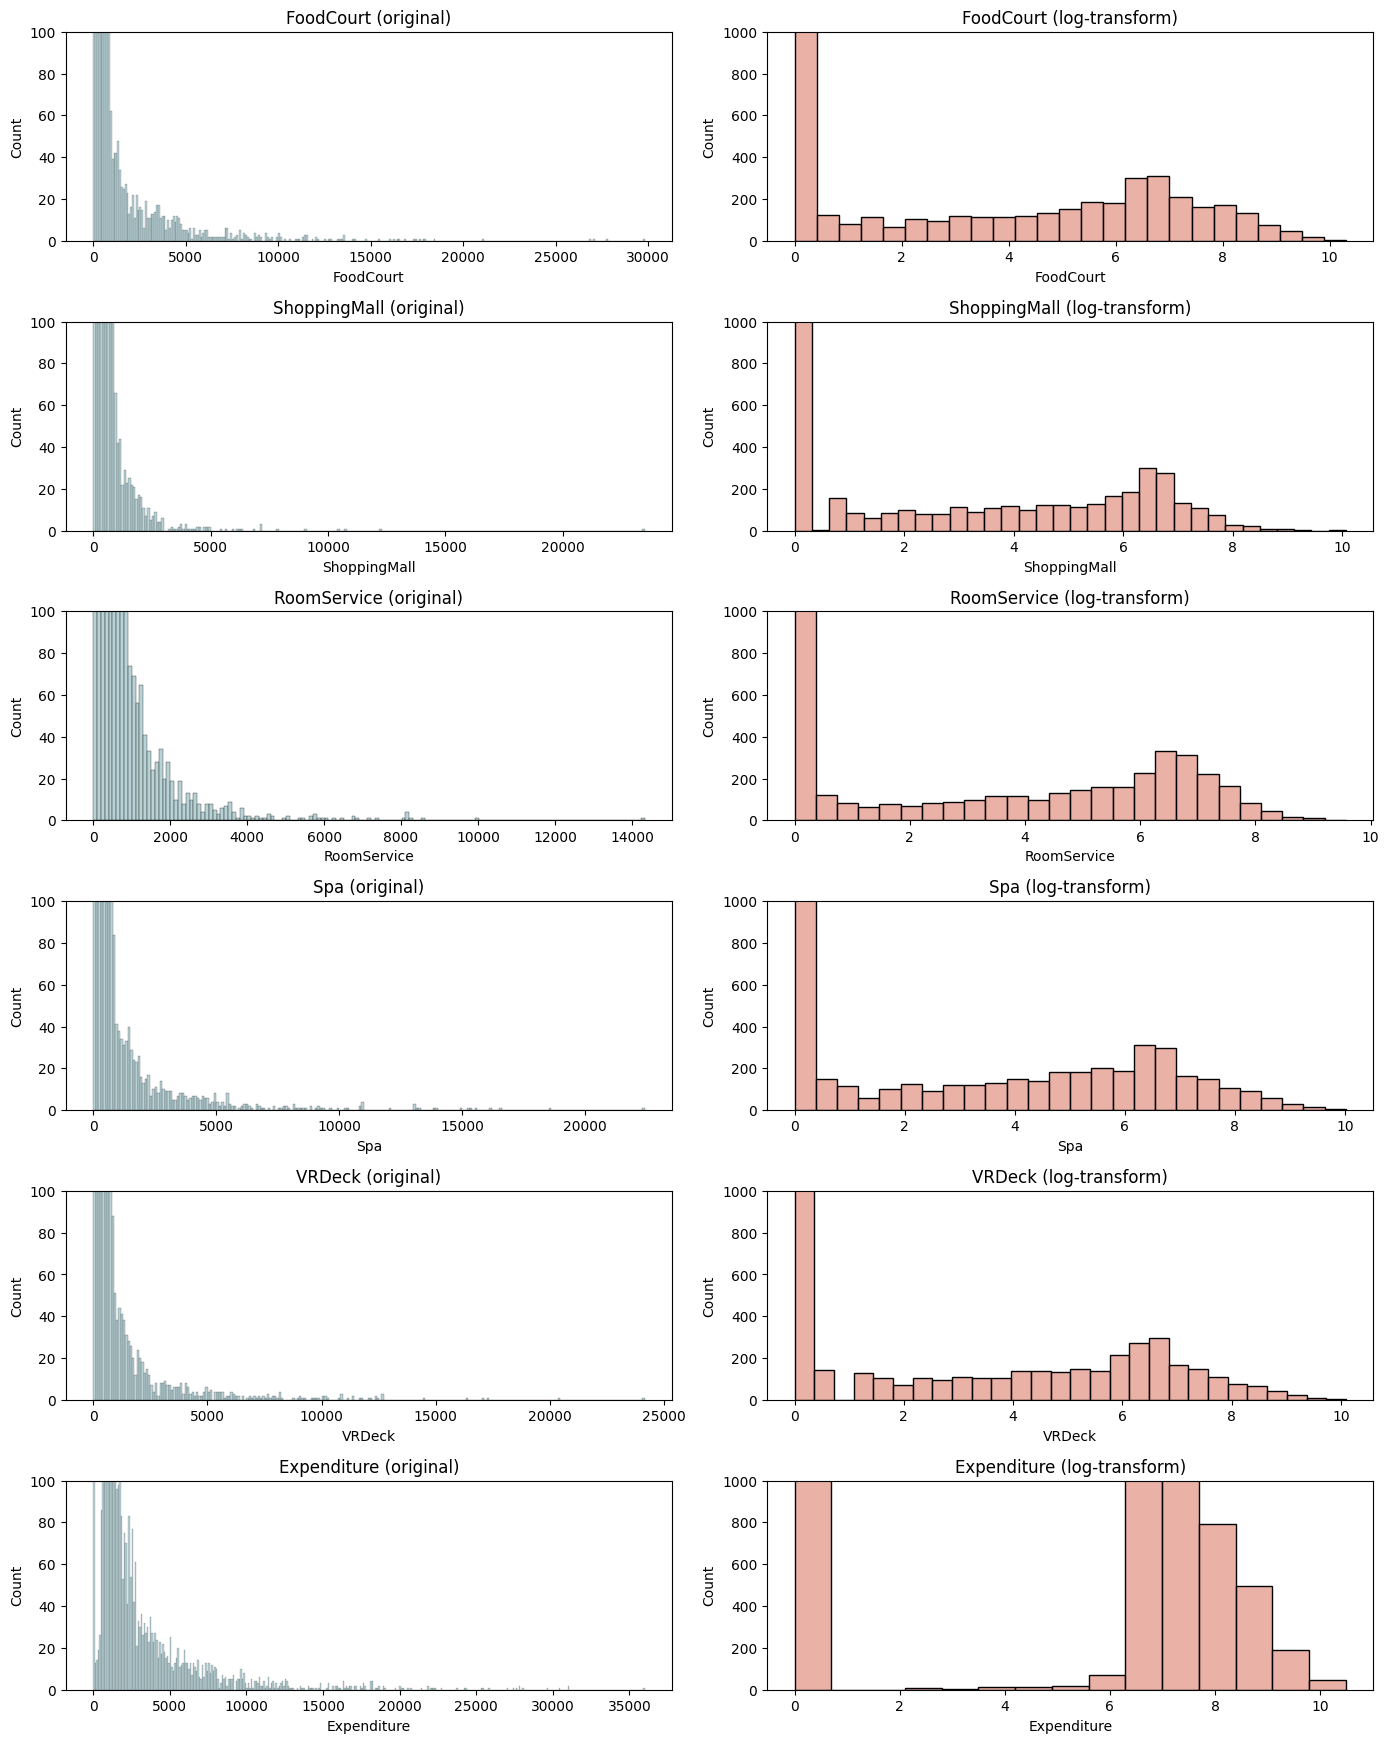

In [81]:
continuous_features = ['FoodCourt','ShoppingMall','RoomService','Spa','VRDeck','Expenditure']

# Plot log transform results
fig=plt.figure(figsize=(14,20))
for i, col in enumerate(continuous_features):
    plt.subplot(7,2,2*i+1)
    sns.histplot(passenger[col], binwidth=100)
    plt.ylim([0,100])
    plt.title(f'{col} (original)')

    plt.subplot(7,2,2*i+2)
    sns.histplot(np.log(1+passenger[col]), color='C1')
    plt.ylim([0,1000])
    plt.title(f'{col} (log-transform)')

fig.tight_layout()
plt.show()

In [85]:
# Log transform the continuous features
passenger[continuous_features] = np.log1p(passenger[continuous_features])
passenger_test[continuous_features] = np.log1p(passenger_test[continuous_features])

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Scale the numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-hot encode the categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False))
])

# combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

In [87]:
# split the data into features and target
X = passenger.drop(['Transported'], axis=1)
y = passenger['Transported']
X_test = passenger_test

# split the data into passenger and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=24)

# fit the preprocessor
# X = preprocessor.fit_transform(X)           # fit_transform on train set
X_train = preprocessor.fit_transform(X_train)     # fit_transform on train set
X_val = preprocessor.transform(X_val)           # transform on train set
# X_test = preprocessor.transform(X_test)     # transform on test set

# check the shape of the datasets
print(f'Train set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

Train set shape: (6954, 59)
Validation set shape: (1739, 59)
Test set shape: (4277, 24)


In [ ]:
!pip install lazypredict

In [88]:

import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    predictions=False,
    random_state=42,
    classifiers='all'
)

models, predictions = clf.fit(X_train, X_val, y_train, y_val)

models

 97%|█████████▋| 30/31 [00:21<00:00,  1.35it/s]

[LightGBM] [Info] Number of positive: 3513, number of negative: 3441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1776
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505177 -> initscore=0.020708
[LightGBM] [Info] Start training from score 0.020708


100%|██████████| 31/31 [00:22<00:00,  1.40it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.81,0.81,0.81,0.81,0.30
RandomForestClassifier,0.81,0.81,0.81,0.81,1.73
XGBClassifier,0.80,0.80,0.80,0.80,0.33
BaggingClassifier,0.80,0.80,0.80,0.80,0.55
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.60
NuSVC,0.79,0.79,0.79,0.79,4.39
SVC,0.79,0.79,0.79,0.79,3.95
ExtraTreesClassifier,0.78,0.78,0.78,0.78,1.82
LinearSVC,0.78,0.78,0.78,0.78,0.20


# Select a model and train it

In [89]:
# tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# models
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from xgboost              import XGBClassifier

# var
model_list = {}

# func
def score(grid_result):
    # 評估，打分數
    print(f"最佳準確率: {grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}")
    # 取得 cross validation 的平均準確率及標準差
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print(f"{param} {mean}")

In [90]:
# Test
rnd_clf = RandomForestClassifier(n_estimators=400, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_val)
print(rnd_clf.__class__.__name__, accuracy_score(y_val, y_pred))

RandomForestClassifier 0.8079355951696378


In [91]:
!pip install catboost
!pip install lightgbm

  Using cached catboost-1.2.7-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [118]:
from lightgbm             import LGBMClassifier
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier
from sklearn.svm          import SVC
from sklearn.ensemble     import ExtraTreesClassifier
from catboost             import CatBoostClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define models and parameter grids
models_with_params = {
    "LightGBM": (LGBMClassifier(random_state=42,logging_level='none', verbose=-1), {
        'n_estimators': [10, 30, 50, 100],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [5, 10, 20, 30],
        'min_child_samples': [10,20,50,100],
        'min_split_gain': [0, 0.1]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [5,10,100],
        'max_depth': [None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    "XGBoost": (XGBClassifier(random_state=42, eval_metric='logloss'), {
        'n_estimators': [80, 100, 120],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1],
    }),
    "SVM Classifier": (SVC(random_state=42, kernel='rbf', probability=True), {
        'C': [0.1, 1, 10, 100, 150],
        'gamma': [0.1, 0.01, 0.015]
    }),
    "Extra-Trees": (ExtraTreesClassifier(random_state=42), {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }),
    "CatBoost": (CatBoostClassifier(random_state=42, verbose=0), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.15],
        'depth': [4, 6, 8, 10]
    }),
    "AdaBoost": (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    })

}

In [100]:
# Function to perform hyperparameter tuning and evaluate the model
from sklearn.metrics import f1_score, precision_score, recall_score
def tune_and_evaluate_model(model_name, model, params, X_train, y_train, X_val, y_val):
    # Perform GridSearchCV
    search = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1)
    search.fit(X_train, y_train)

    # Retrieve the best model
    best_model = search.best_estimator_

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"F1 Score: {f1}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"Best Params: {search.best_params_}")

    return {"Model": model_name, "Accuracy": accuracy, "AUC": auc, "F1_score": f1, "Precision_score":precision, "Recall_score":recall, "Best Params": search.best_params_}

In [129]:
# Store results
results = []

# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['LightGBM']
result = tune_and_evaluate_model('LightGBM', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: LightGBM
Accuracy: 0.8113858539390454
AUC: 0.9064926389862568
F1 Score: 0.8185840707964602
Precision Score: 0.7847295864262991
Recall Score: 0.8554913294797688
Best Params: {'learning_rate': 0.15, 'max_depth': 20, 'min_child_samples': 10, 'min_split_gain': 0, 'n_estimators': 30}


In [130]:

# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['Random Forest']
result = tune_and_evaluate_model('Random Forest', model, params, X_train, y_train, X_val, y_val)
results.append(result)


Model: Random Forest
Accuracy: 0.8113858539390454
AUC: 0.8991422071136626
F1 Score: 0.8095238095238095
Precision Score: 0.8133022170361727
Recall Score: 0.8057803468208092
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [119]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['XGBoost']
result = tune_and_evaluate_model('XGBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: XGBoost
Accuracy: 0.8096607245543416
AUC: 0.9077121995740797
F1 Score: 0.8133107727016357
Precision Score: 0.7940528634361234
Recall Score: 0.8335260115606936
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120, 'subsample': 0.8}


In [131]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['SVM Classifier']
result = tune_and_evaluate_model('SVM Classifier', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: SVM Classifier
Accuracy: 0.8096607245543416
AUC: 0.8944848613113584
F1 Score: 0.8155988857938719
Precision Score: 0.7870967741935484
Recall Score: 0.846242774566474
Best Params: {'C': 10, 'gamma': 0.015}


In [104]:
# Iterate over models and perform tuning/evaluation
(model, params) = models_with_params['Extra-Trees']
result = tune_and_evaluate_model('Extra-Trees', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: Extra-Trees
Accuracy: 0.7924094307073031
AUC: 0.8853791616513009
F1 Score: 0.7797437461866992
Precision Score: 0.8255813953488372
Recall Score: 0.738728323699422
Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [132]:
(model, params) = models_with_params['CatBoost']
result = tune_and_evaluate_model('CatBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: CatBoost
Accuracy: 0.81943645773433
AUC: 0.9121817171730533
F1 Score: 0.8247767857142857
Precision Score: 0.7971952535059331
Recall Score: 0.8543352601156069
Best Params: {'depth': 6, 'learning_rate': 0.1, 'n_estimators': 200}


In [106]:
(model, params) = models_with_params['AdaBoost']
result = tune_and_evaluate_model('AdaBoost', model, params, X_train, y_train, X_val, y_val)
results.append(result)

Model: AdaBoost
Accuracy: 0.7993099482461185
AUC: 0.8932196664065291
F1 Score: 0.8057874234835838
Precision Score: 0.776824034334764
Recall Score: 0.8369942196531792
Best Params: {'learning_rate': 0.2, 'n_estimators': 200}


In [120]:
# Convert results to a DataFrame for display
pd.DataFrame(results)

,Model,Accuracy,AUC,F1_score,Precision_score,Recall_score,Best Params
0,LightGBM,0.81,0.91,0.81,0.78,0.85,"{'learning_rate': 0.1, 'max_depth': 20, 'min_c..."
1,XGBoost,0.81,0.91,0.82,0.79,0.84,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2,SVM Classifier,0.81,0.89,0.81,0.79,0.84,"{'C': 100, 'gamma': 0.01}"
3,Extra-Trees,0.79,0.89,0.78,0.83,0.74,"{'max_depth': None, 'min_samples_split': 10, '..."
4,CatBoost,0.82,0.91,0.82,0.80,0.85,"{'depth': 6, 'learning_rate': 0.1, 'n_estimato..."
5,AdaBoost,0.80,0.89,0.81,0.78,0.84,"{'learning_rate': 0.2, 'n_estimators': 200}"
6,XGBoost,0.81,0.91,0.81,0.79,0.83,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


# Result

In [ ]:
print(results[4])

{'Model': 'Random Forest', 'Accuracy': 0.8154111558366878, 'AUC': 0.9015337098715623, 'Best Params': {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}}


In [ ]:
RF_model = results[1].get('Best Params')  # Use get method to avoid KeyError
RF_model = RandomForestClassifier(**RF_model, random_state=42) # Instantiate the model with best params
RF_model.fit(X_train, y_train)
RF_val_pred = RF_model.predict(X_val)
print(RF_model.__class__.__name__, accuracy_score(y_val, RF_val_pred))
print(RF_model)

RandomForestClassifier 0.8154111558366878
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)


In [112]:
LGB_model = results[0].get('Best Params')  # Use get method to avoid KeyError
LGB_model = LGBMClassifier(**LGB_model, random_state=42) # Instantiate the model with best params
LGB_model.fit(X_train, y_train)
LGB_val_pred = LGB_model.predict(X_val)
print(LGB_model.__class__.__name__, accuracy_score(y_val, LGB_val_pred))

LGBMClassifier 0.8079355951696378


In [121]:
XGB_model = results[6].get('Best Params')  # Use get method to avoid KeyError
XGB_model = XGBClassifier(**XGB_model, random_state=42) # Instantiate the model with best params
XGB_model.fit(X_train, y_train)
XGB_val_pred = XGB_model.predict(X_val)
print(XGB_model.__class__.__name__, accuracy_score(y_val, XGB_val_pred))
print(XGB_model)

XGBClassifier 0.8096607245543416
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
cat_model = results[5].get('Best Params')  # Use get method to avoid KeyError
print(cat_model)
cat_model = CatBoostClassifier(**cat_model, random_state=42) # Instantiate the model with best params
#cat_model.fit(X_train, y_train)
#cat_val_pred = cat_model.predict(X_val)
#print(cat_model.__class__.__name__, accuracy_score(y_val, cat_val_pred))
LearningCurveDisplay.from_estimator(cat_model, X, y, cv=5)
plt.show()

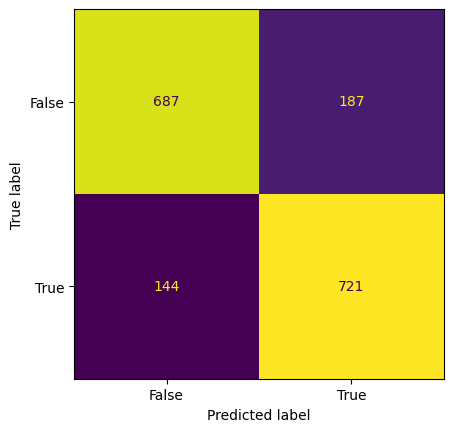

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_val, XGB_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[False, True])
disp.plot(colorbar=False)
plt.show()

In [124]:
X = passenger.drop(['Transported'], axis=1)
y = passenger['Transported']
X_test = passenger_test
X = preprocessor.fit_transform(X)
X_test = preprocessor.transform(X_test)


In [126]:
best_model = 0
from sklearn.model_selection import LearningCurveDisplay
best_para = results[1].get('Best Params')  # Use get method to avoid KeyError
print(best_para)
best_model = XGBClassifier(**best_para, random_state=42)
best_model.fit(X, y)
y_test_pred = best_model.predict(X_test)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
print(best_model.__class__.__name__, accuracy_score(test, y_test_pred))

TypeError: '<' not supported between instances of 'bool' and 'str'

In [127]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Assign PassengerId from the original test dataset
    'Transported': y_test_pred     # Predicted values for the target variable
})

# Ensure 'Transported' column is in boolean format
submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

# Display the first few rows of the submission DataFrame
print(submission.head(10))

Submission file 'submission.csv' created successfully!
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True


In [128]:
#download submittion.csv
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>